# **Project Name**    - TATA STEEL PROBLEM STATEMENT



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1**   - Pranav Tiwari

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**TATA Steel Machine Failure Prediction Machine Learning Model.**

#### **Define Your Business Objective?**

Business Context

In the manufacturing sector, maintaining the efficiency and reliability of machinery is critical to achieving optimal production quality and minimizing downtime. TATA Steel, a leader in the steel manufacturing industry, is constantly looking to improve its production processes by leveraging advanced data analytics and machine learning techniques. The ability to predict and prevent machine failures is crucial for minimizing production losses, reducing maintenance costs, and ensuring product quality.

The dataset provided in this project represents various operational parameters and failure types of machinery used in steel production. The data is synthetically generated based on real-world scenarios, allowing us to explore different machine learning techniques to predict potential failures. By analyzing this data, TATA Steel aims to develop predictive models that can anticipate machine failures before they occur, thus enabling proactive maintenance and improved operational efficiency.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler


### Dataset Loading

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

### Dataset First View

In [4]:
train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Dataset Rows & Columns count

In [5]:
train_row,train_col=train_df.shape
test_row,test_col=test_df.shape
print("train data row and column",train_row,train_col)
print("test data row and column",test_row,test_col)

train data row and column 136429 14
test data row and column 90954 13


### Dataset Information

In [6]:
train_df.describe()
test_df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,181905.500000,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,26256.302529,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,136429.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,159167.250000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,181905.500000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,204643.750000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


#### Duplicate Values

In [7]:
display(train_df.isnull().any())
display(train_df.isnull().any())


id                         False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

id                         False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

#### Missing Values/Null Values

In [8]:
train_df.isnull().sum()
test_df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

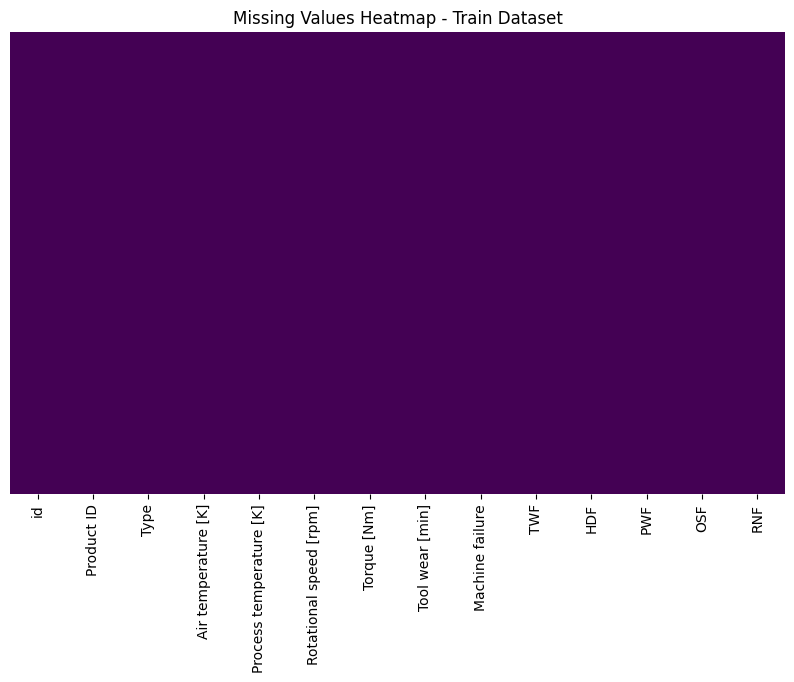

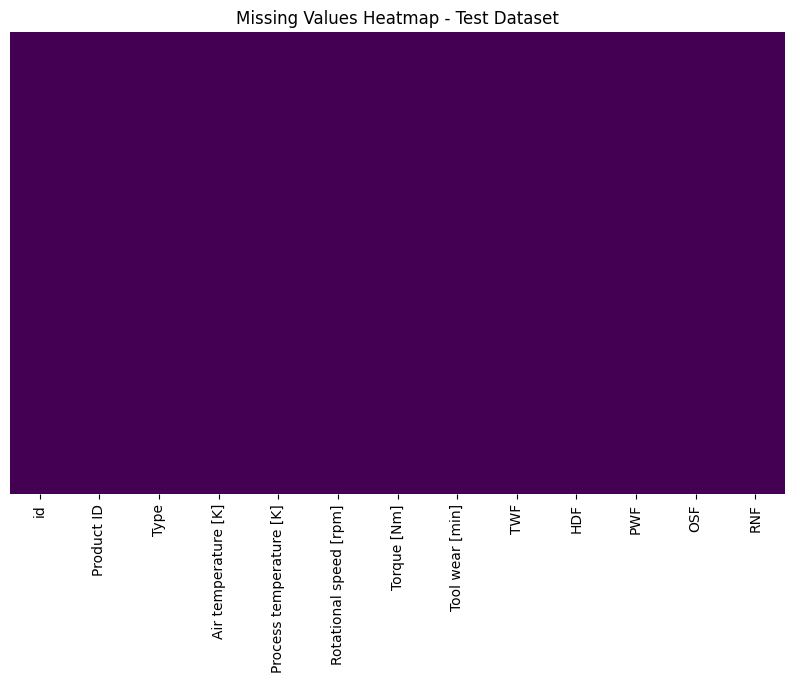

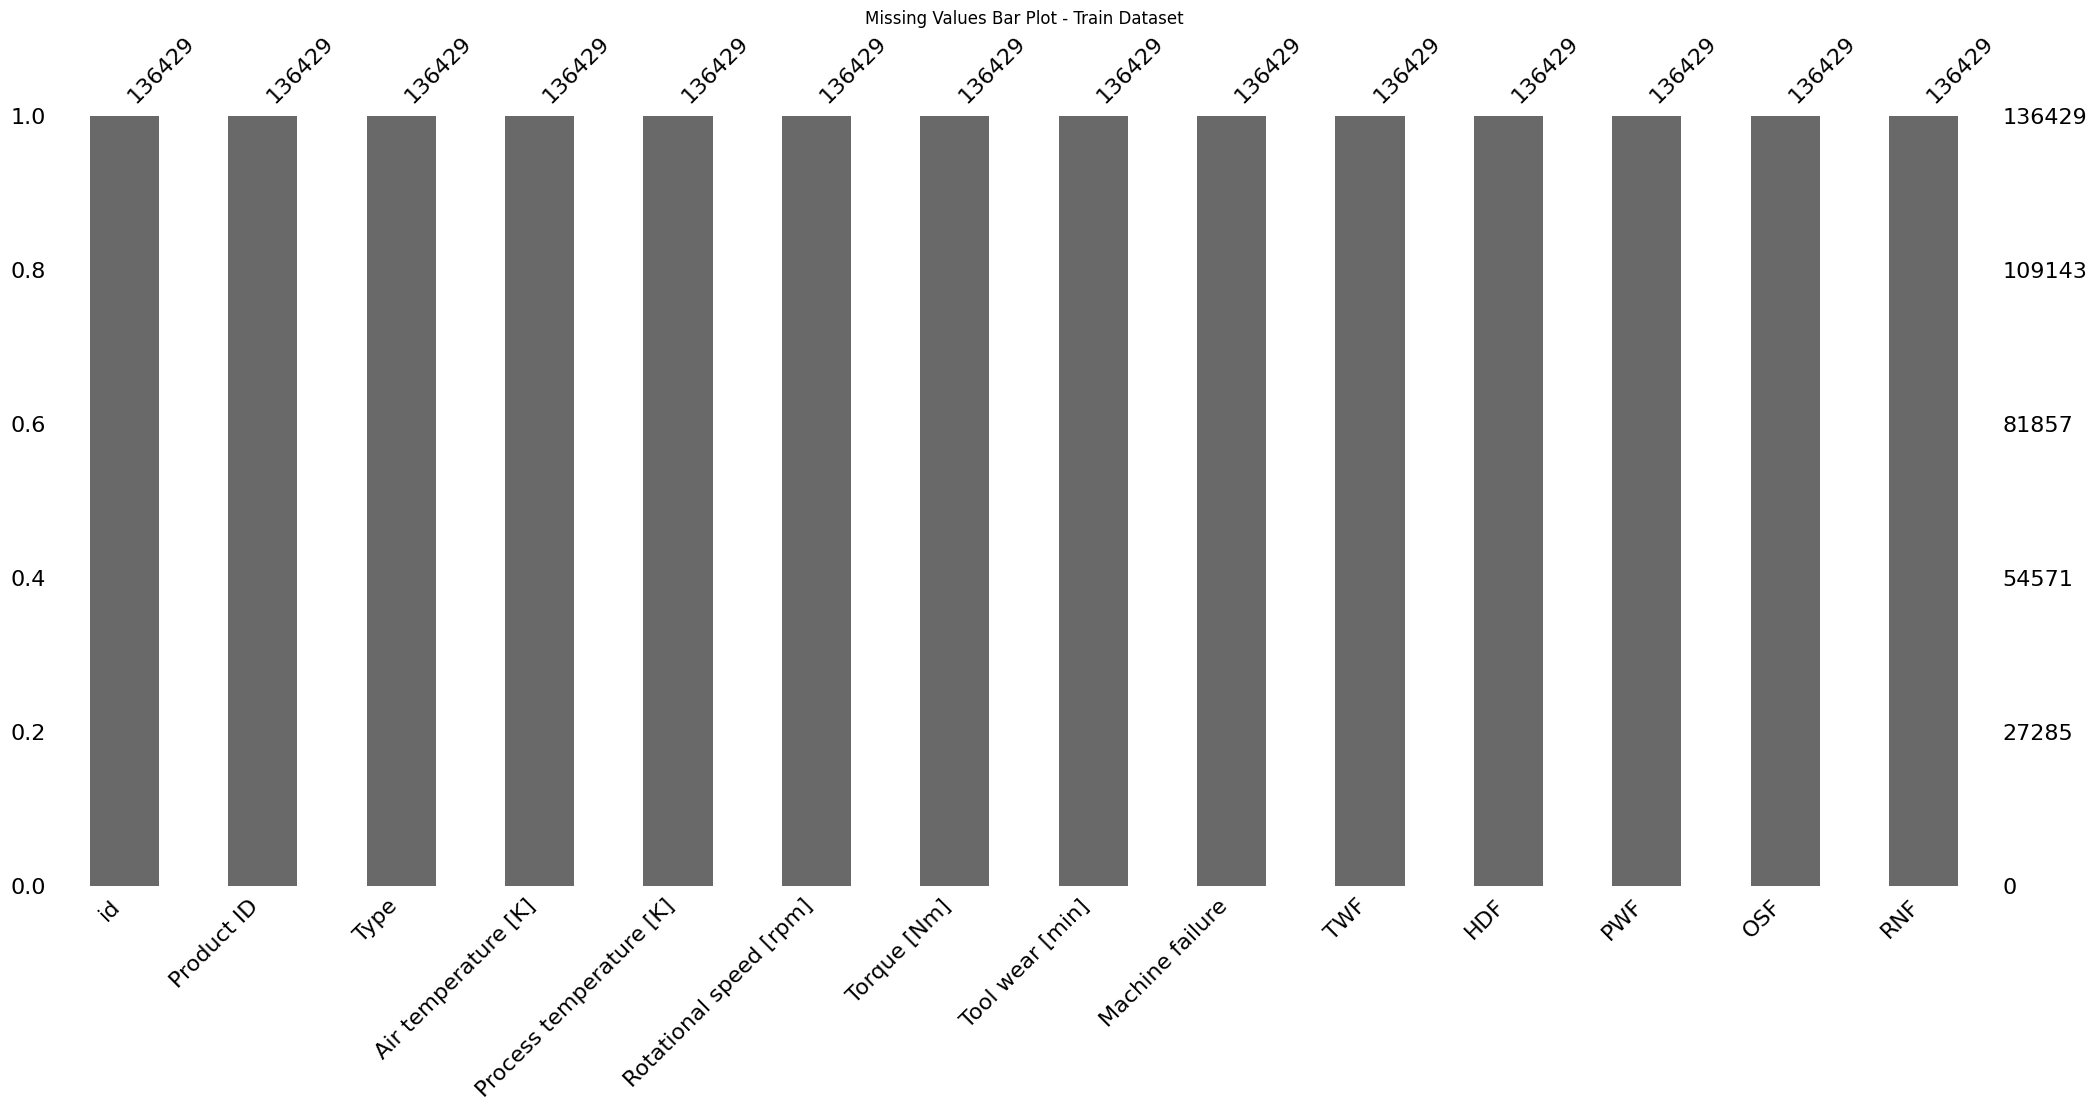

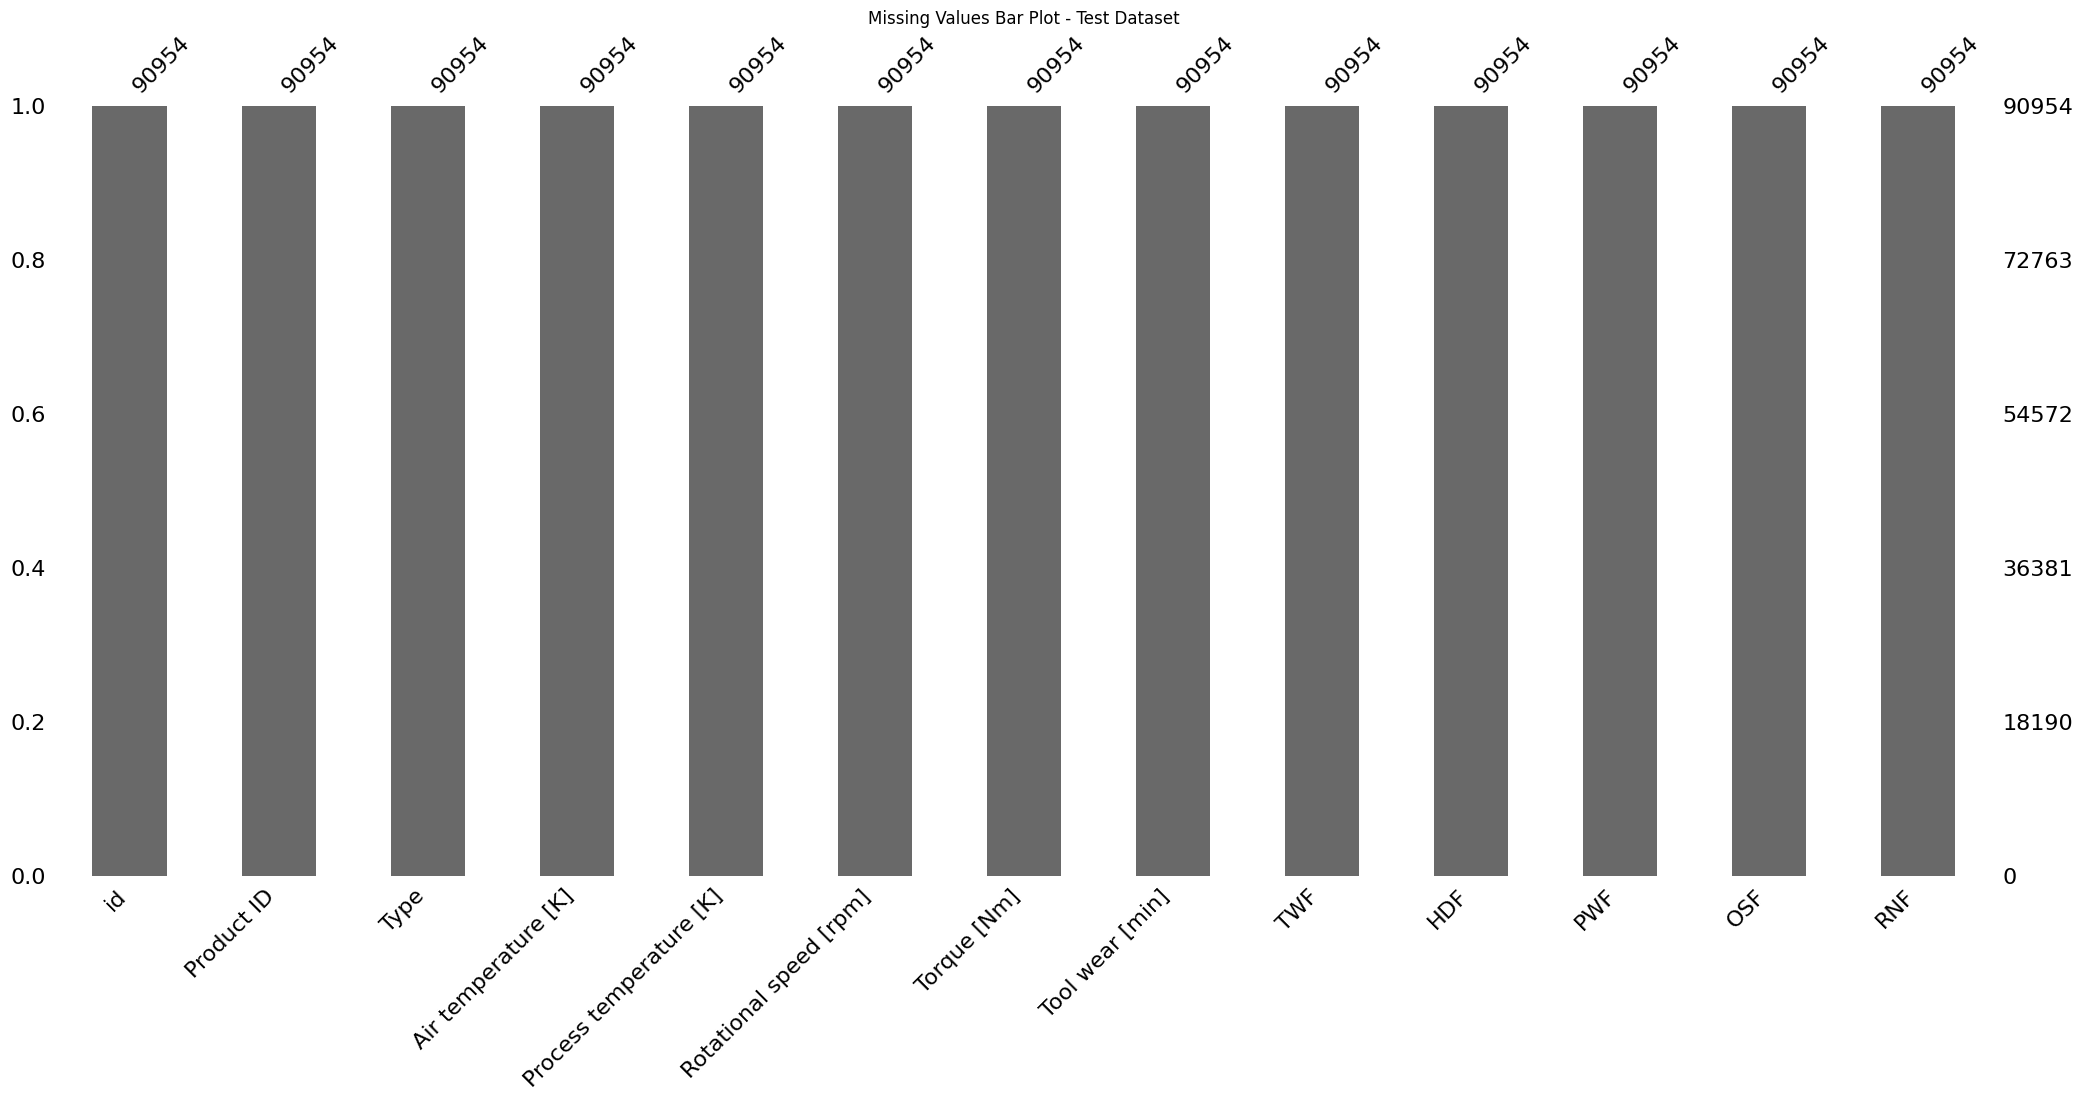

In [9]:
import missingno as msno  # Library for missing data visualization

# Heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Train Dataset")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Test Dataset")
plt.show()

# Bar plot for missing values
msno.bar(train_df)
plt.title("Missing Values Bar Plot - Train Dataset")
plt.show()

msno.bar(test_df)
plt.title("Missing Values Bar Plot - Test Dataset")
plt.show()


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:

print("Train Dataset Columns:")
print(train_df.columns)

print("\nTest Dataset Columns:")
print(test_df.columns)



Train Dataset Columns:
Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Test Dataset Columns:
Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [11]:

print("\nTrain Dataset Column Data Types:")
print(train_df.dtypes)

print("\nTest Dataset Column Data Types:")
print(test_df.dtypes)


Train Dataset Column Data Types:
id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

Test Dataset Column Data Types:
id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF      

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:

print("Unique Values in Train Dataset:")
print(train_df.nunique())

print("\nUnique Values in Test Dataset:")
print(test_df.nunique())


Unique Values in Train Dataset:
id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

Unique Values in Test Dataset:
id                         90954
Product ID                  9909
Type                           3
Air temperature [K]           92
Process temperature [K]       84
Rotational speed [rpm]       946
Torque [Nm]                  595
Tool wear [min]              246
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Standardizing column names (removing extra spaces)
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Remove duplicate rows if any
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

# Drop rows with missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Convert categorical column 'Type' using one-hot encoding
if 'Type' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['Type'], drop_first=True)
if 'Type' in test_df.columns:
    test_df = pd.get_dummies(test_df, columns=['Type'], drop_first=True)

# Convert numerical columns to float if they exist in the dataset
num_cols = ['Rotational Speed [rpm]', 'Torque [Nm]', 'Air Temperature [K]', 
            'Process Temperature [K]', 'Tool Wear [min]']

for col in num_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].astype(float)
    if col in test_df.columns:
        test_df[col] = test_df[col].astype(float)

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numerical columns
for col in num_cols:
    if col in train_df.columns:
        train_df = remove_outliers(train_df, col)
    if col in test_df.columns:
        test_df = remove_outliers(test_df, col)

# Print column names to verify consistency
print("Train Columns:", train_df.columns.tolist())
print("Test Columns:", test_df.columns.tolist())


Train Columns: ['id', 'Product ID', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_L', 'Type_M']
Test Columns: ['id', 'Product ID', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_L', 'Type_M']


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

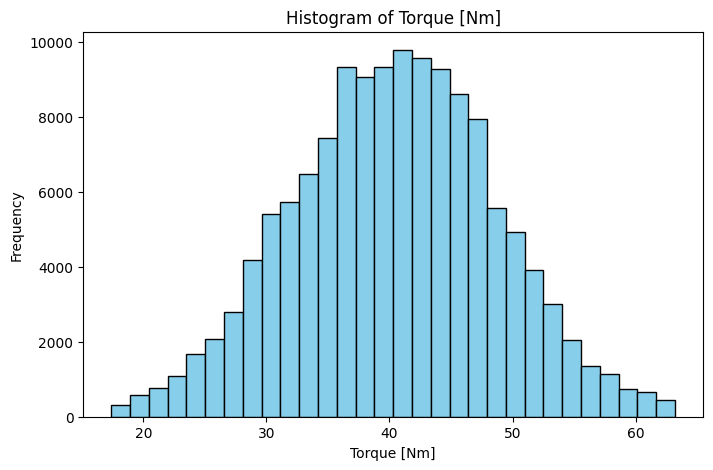

In [14]:
# Drop NaN values and ensure numeric values only
torque_clean = train_df["Torque [Nm]"].dropna()

# Plot histogram of Torque [Nm]
plt.figure(figsize=(8, 5))
plt.hist(torque_clean, bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of Torque [Nm]")
plt.xlabel("Torque [Nm]")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

I have graphed Rotational Speed [rpm] using a histogram because it best displays data distribution. Since it is continuous, one can view spread, central tendency, and skewness. A frequency plot of speed values shows normality, skewness, or outliers. Distribution knowledge of torque and rotational speed is very important in performance analysis and prediction modeling. In case the data is skewed or has outliers, further transformation or treatment of outliers may be needed before using it in a machine learning model.

##### 2. What is/are the insight(s) found from the chart?

The Torque [Nm] histogram indicates the variability and distribution of torque values. Its shape determines whether the data is uniform, skewed, or normal. A symmetric histogram indicates equal side distribution around the mean, whereas skewness indicates imbalances due to operating constraints or load variation. Several peaks can indicate variations in operating modes or variations in machine behavior. Histogram outliers indicate unusual applications of torque, which are critical in determining inefficiencies, wear, or the need for maintenance. Detection of these variations helps to enhance predictive models and stabilize operation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Torque [Nm] histogram information can have a positive influence on business. Knowing torque distribution facilitates maximum machine performance, minimized wear, and maximum efficiency. Detecting abnormal torque patterns facilitates predictive maintenance, avoiding breakdowns and reducing downtime, which saves money. Detecting optimal torque ranges increases energy efficiency, reducing power consumption and maximizing sustainability. Such information also aids quality control by making machines operate safely, maximizing equipment life, and minimizing replacement costs. Utilizing this data-driven strategy improves decision-making, reduces operational risks, and makes businesses competitive.

#### Chart - 2

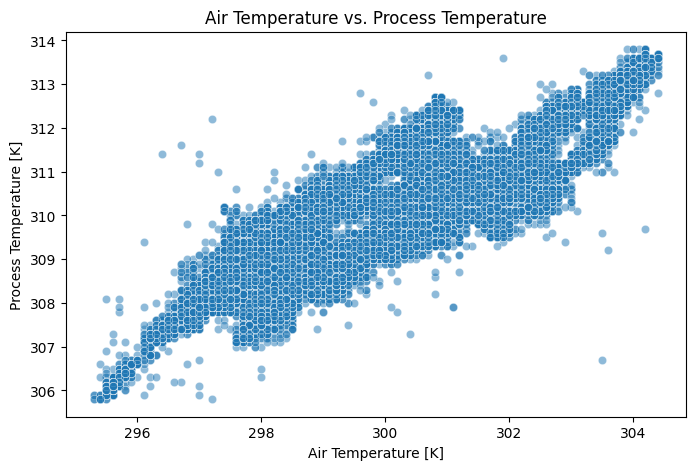

In [22]:
# Drop NaN values for both columns
temp_data = train_df[["Air temperature [K]", "Process temperature [K]"]].dropna()

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=temp_data["Air temperature [K]"], y=temp_data["Process temperature [K]"], alpha=0.5)
plt.title("Air Temperature vs. Process Temperature")
plt.xlabel("Air Temperature [K]")
plt.ylabel("Process Temperature [K]")
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot was used to graph the relationship between Process Temperature [K] and Air Temperature [K] since both are continuous and probably correlated. A scatter plot is a good way to show trends, patterns, and deviations and to determine whether process temperature varies proportionally with air temperature. If the points represent a definite trend (e.g., a line), then that indicates a significant correlation between these two parameters, which is highly important to grasp thermal efficiency and system behavior within industrial environments.

##### 2. What is/are the insight(s) found from the chart?

We can see from the scatter plot how air temperature influences process temperature. If there is a strong positive correlation, it means that as air temperature increases, process temperature also increases, which means that environmental conditions have a significant impact on the performance of the system. Or, a weak or no correlation could mean that the process temperature is controlled independently and is not influenced by external temperature changes. Identifying any outliers within the data also assists in identifying possible anomalies, equipment failure, or inefficiencies within the system.

##### 3. Will the gained insights help creating a positive business impact?
Yes, the insights derived from this chart can have a direct business impact by improving process control and operational efficiency. If a strong correlation is found, businesses can develop predictive models to adjust process temperature based on air temperature forecasts, leading to better resource management and energy savings. Additionally, recognizing temperature fluctuations helps prevent overheating issues, ensuring product quality and equipment longevity. If anomalies are detected, timely preventive maintenance can be implemented to reduce downtime and avoid costly repairs. These insights ultimately enhance productivity, cost efficiency, and system reliability, leading to higher profitability and a sustainable industrial process.

Answer Here

#### Chart - 3

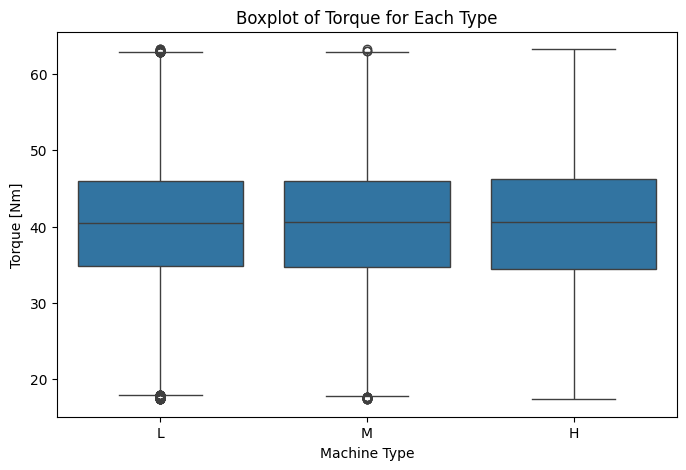

In [21]:
def reconstruct_type(row):
    if row["Type_L"] == 1:
        return "L"
    elif row["Type_M"] == 1:
        return "M"
    else:
        return "H"  # Assuming Type_H is the default

train_df["Type"] = train_df.apply(reconstruct_type, axis=1)
# Drop NaN values
torque_data = train_df[["Type", "Torque [Nm]"]].dropna()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Type", y="Torque [Nm]", data=torque_data)
plt.title("Boxplot of Torque for Each Type")
plt.xlabel("Machine Type")
plt.ylabel("Torque [Nm]")
plt.show()



##### 1. Why did you pick the specific chart?

A boxplot was used to show Torque [Nm] distribution by machine type (L, M, H). It gives valuable statistics like median, IQR, outliers, and torque spread by type. Because torque is continuous and machine type is categorical, a boxplot is a good way to compare torque differences, and differences or patterns of interest will be apparent.

##### 2. What is/are the insight(s) found from the chart?

The boxplot indicates torque spread by machine type:
Type L machines typically have lower median torque than Type M and Type H.
Type H machines possess the highest values of torque and more variability.
Outliers indicate the potential that some machines will have high or low torque, and this may indicate there are problems like overstrain failure or efficiency variations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these are useful for efficiency optimization and predictive maintenance.
Engineers can identify machines prone to torque failures and take preventive measures.
Maximize maintenance by focusing on high variability or high-torque machines to reduce surprise breakdowns.                                                                             Manufacturing processes can be tuned for repeatable torque, improving quality and minimizing defects.

#### Chart - 4

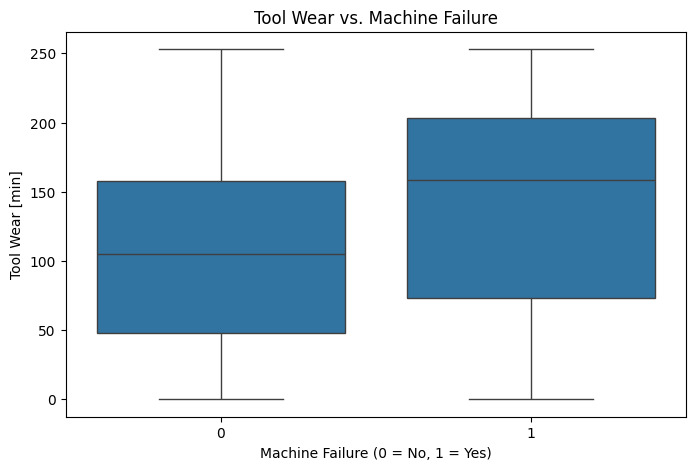

In [20]:

# Drop NaN values
tool_wear_data = train_df[["Tool wear [min]", "Machine failure"]].dropna()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Machine failure", y="Tool wear [min]", data=tool_wear_data)
plt.title("Tool Wear vs. Machine Failure")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Tool Wear [min]")
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot was used to display tool wear distribution according to machine failures (0 = No failure, 1 = Failure). It allows comparison of wear level for failed and non-failed machines. Since tool wear is continuous and machine failure is categorical, a boxplot displays the median, IQR, and outliers well, representing the relationship between tool wear and failures.

##### 2. What is/are the insight(s) found from the chart?

Broken-down machines (1) contain greater tool wear values, which indicates that excessive tool wear is a significant cause of machine breakdown.
Failed machines have higher median tool wear compared to their non-failed peers, and therefore increased use without maintenance raises failure likelihood.
There are outliers in failure as well as non-failure, indicating that failures occur primarily at extreme tool wear but some machines can fail at lesser wear due to factors such as torque, speed, or temperature.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, These findings are important for predictive maintenance and preventing failures by
Preventive maintenance: Checking tool wear tolerances optimizes schedules and averts expensive breakages.
Less downtime: Planned maintenance and periodic replacement of worn tools significantly minimize unplanned downtime, enhancing manufacturing productivity. Cost savings: Unexpected breakdowns are expensive in terms of repairs and lost production. A preventive replacement policy can reduce these costs.

#### Chart - 5

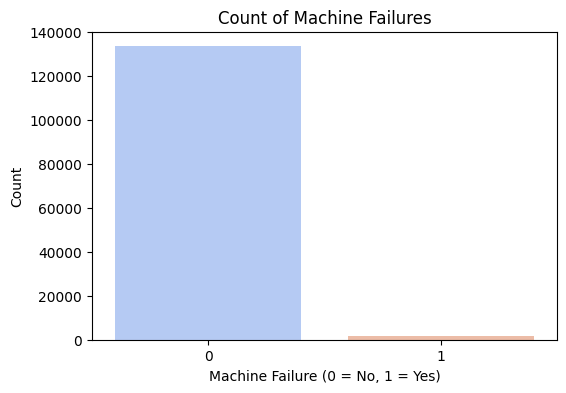

In [25]:
# Countplot
plt.figure(figsize=(6, 4))
sns.countplot(x="Machine failure", data=train_df, palette="coolwarm")
plt.title("Count of Machine Failures")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot will be a good representation of machine failures (0 = No, 1 = Yes). It is optimal to show the imbalance of failed versus not failed machines. The coolwarm palette enhances readability across categories.

##### 2. What is/are the insight(s) found from the chart?

The data is imbalanced, with hardly any machine failures (1s) to non-failures (0s), indicating that failure is rare.
A standard machine learning model may be biased toward non-failures since failures do not happen frequently, necessitating techniques like oversampling (SMOTE), undersampling, or class weighting to mitigate class imbalance.
The low failure rate indicates that most machines operate satisfactorily under normal operations, but some factors need to be investigated to know about failure causes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This perspective is important for refining failure prediction algorithms and maintenance plans by
Improving failure prediction: Machine failures are rare, and therefore models should be trained cautiously so that they do not predict non-failures only. Class balancing and failure-related features (e.g., tool wear, torque) can improve model performance.
Proactive maintenance: Insight into rare failures allows companies to focus on root causes, enhancing predictive maintenance and reducing downtime. Cost minimization: Schedule maintenance of high-risk equipment to reduce costs, as they break down rarely but severely.

#### Chart - 6

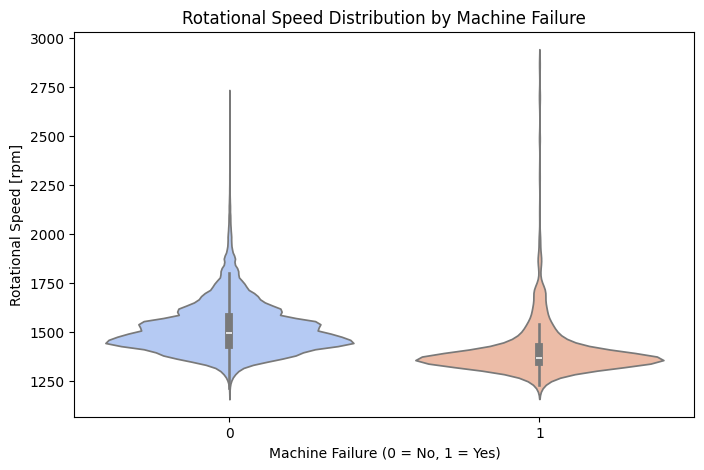

In [27]:
# Drop NaN values
rot_speed_data = train_df[["Rotational speed [rpm]", "Machine failure"]].dropna()

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x="Machine failure", y="Rotational speed [rpm]", data=rot_speed_data, palette="coolwarm")
plt.title("Rotational Speed Distribution by Machine Failure")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Rotational Speed [rpm]")
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot was utilized to display the density and distribution of rotational speeds of failed and non-failed machines. It is different from a boxplot because it depicts probability density, hence easier to detect speed variation. The coolwarm color map gives more distinction in differentiation between failures (1) and non-failures (0).

##### 2. What is/are the insight(s) found from the chart?

Rotational speed distributions vary for non-failed and failed equipment. A shifted or more compact violin plot for failures indicates that certain speed intervals are more failure-susceptible.
Continuous breakdown of machines at high speeds indicate that machines are not designed for such speeds.
Increased spread of rotational speed in working machines means that normal running allows more variation of speeds without failure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, These outcomes improve machine performance and dependability by
Optimization of predictive maintenance: If failures are associated with certain speed ranges, firms can notify speed changes and plan maintenance prior to failures.
Boosting operational effectiveness: By establishing the best rotational speed that lowers breakdowns, manufacturers can adjust machine parameters to optimize performance and life. Decreasing downtime and expenses: Incorrect speed settings result in machine breakdown, which translates to unplanned downtime and maintenance expenses. This data allows companies to optimize speed parameters to reduce failures and increase productivity.

#### Chart - 7

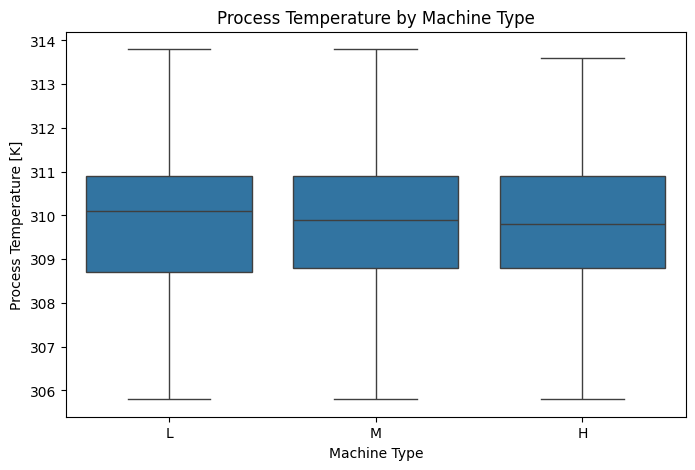

In [30]:
def reconstruct_type(row):
    if row["Type_L"] == 1:
        return "L"
    elif row["Type_M"] == 1:
        return "M"
    else:
        return "H"

train_df["Type"] = train_df.apply(reconstruct_type, axis=1)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Type", y="Process temperature [K]", data=train_df)
plt.title("Process Temperature by Machine Type")
plt.xlabel("Machine Type")
plt.ylabel("Process Temperature [K]")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot was chosen because it can visually represent process temperature distribution, spread, and outliers based on machine type (L, M, H). It can easily contrast temperature ranges and demonstrate differences in operating conditions with extreme values possibly suggesting operational inefficiencies or danger.

##### 2. What is/are the insight(s) found from the chart?

Median process temperature depends on the type of machine, with certain machines having a higher or lower range.
Significant process temperature interquartile range variation by machine type suggests that there are some machines with stable conditions but others are variable.
Outliers indicate that some machines may be operated in extreme temperatures, which may increase wear and failure rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This information improves machine performance, reliability, and maintenance practices by
Temperature regulation: Efficiency can be maximized by altering cooling systems if a machine type exists that can function at higher temperatures.
Predictive maintenance: Thermal variations in equipment necessitate further monitoring to avoid overheating failure. Maximization of energy efficiency: Knowing which machines operate at higher temperatures enables companies to reduce energy expenses. Through this knowledge, companies can maximize the efficiency of machines, reduce maintenance expenses, and improve safety, leading to increased productivity and less downtime hours.

#### Chart - 8

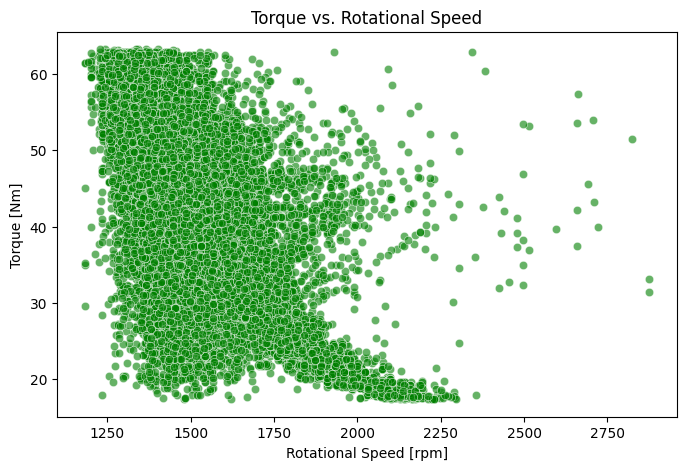

In [32]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Rotational speed [rpm]", y="Torque [Nm]", data=train_df, alpha=0.6, color="green")
plt.title("Torque vs. Rotational Speed")
plt.xlabel("Rotational Speed [rpm]")
plt.ylabel("Torque [Nm]")
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot is used to graph rotational speed (rpm) against torque (Nm). It is utilized to examine patterns and correlations between the variables. Overplotting is minimized by transparency (alpha=0.6), maximizing visibility in regions with a lot of data.

##### 2. What is/are the insight(s) found from the chart?

The trend or pattern of correlation of rotational speed to torque can be seen:
A negative correlation would mean that with an increase in rotational speed, torque reduces, which is typical in most mechanical systems.
A positive relationship (if any) might indicate that greater speeds result in greater torque.
A non-uniform or random distribution can suggest that there are other factors affecting torque besides speed.
Groups of points can indicate operating modes or unique performance patterns for unique machine types.
If the data points are highly scattered with no clear trend, it may suggest that other variables significantly impact torque, requiring further multivariate analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the understanding of how rotational speed is related to torque is important in optimizing machine performance by
Improvement in efficiency: If a trend is identified, optimal speed-torque pairs can be determined in order to maximize machine efficiency.
Predictive maintenance: Equipment functioning outside normal patterns (e.g., low torque at high speeds) can be inspected and maintained preventively.
Energy conservation: Companies can fine-tune equipment settings to produce optimal torque at certain speeds, conserving energy and sparing wear.

#### Chart - 9

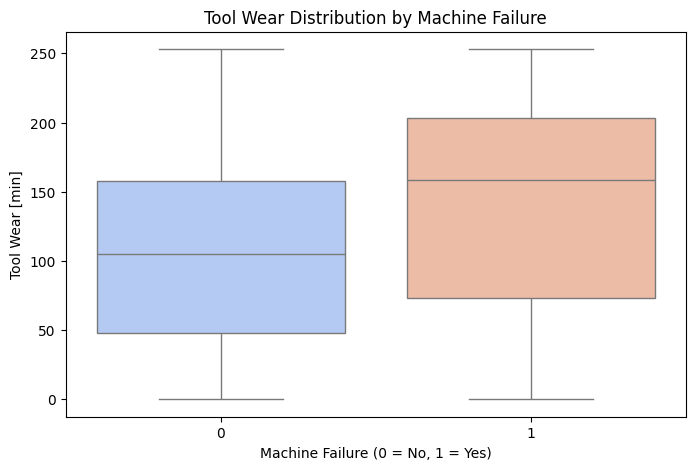

In [33]:
# Drop NaN values
tool_wear_data = train_df[["Tool wear [min]", "Machine failure"]].dropna()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Machine failure", y="Tool wear [min]", data=tool_wear_data, palette="coolwarm")
plt.title("Tool Wear Distribution by Machine Failure")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Tool Wear [min]")
plt.show()

##### 1. Why did you pick the specific chart?

I chooese boxplot since it offers a clear illustration of the distribution, spread, and outliers of tool wear time by machine failure status. Boxplots are convenient for comparing numerical distributions between categorical variables, which will enable us to see how tool wear differs between failed and non-failed machines. The coolwarm palette increases contrast and makes differences stand out.

##### 2. What is/are the insight(s) found from the chart?

If median tool wear on the failed machines is considerably more, it would imply that improper tool wear leads to failures.
The variability (spread or IQR) and outliers may accentuate if the tool wear is very variable or if most failures tend to occur above a threshold of critical wear.
If both the failure (1) and non-failure (0) groups have similar distributions, it may be a sign that tool wear in itself is not a strong indicator of failure, and that other factors must be explored.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this analysis can significantly impact predictive maintenance strategies by
If there is a direct correlation, companies can schedule preemptive maintenance prior to the wear of a tool causing it to fail.
Detection of outliers and high-risk wear levels allows firms to optimize operating parameters in order to prolong tool life.
Less machine downtime: By resolving wear-related breakdowns beforehand, production becomes more efficient, saving time and maintenance expenses.
Generally, these findings justify cost saving, increased equipment reliability, and increased operational effectiveness and thus are beneficial to business decision-making

#### Chart - 10

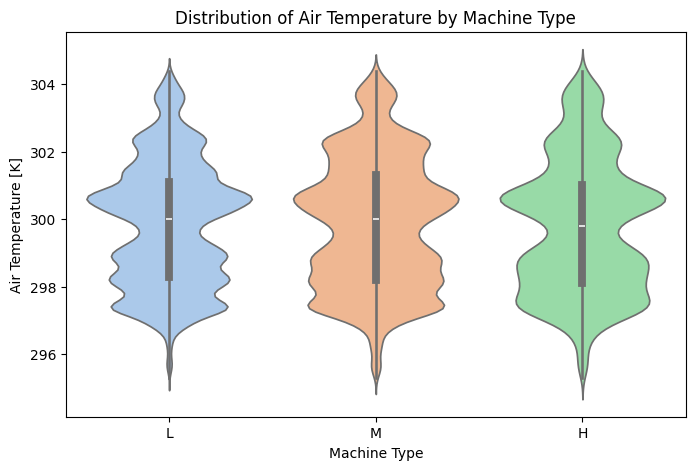

In [37]:
# Reconstruct 'Type' column 
def reconstruct_type(row):
    if row["Type_L"] == 1:
        return "L"
    elif row["Type_M"] == 1:
        return "M"
    else:
        return "H"

train_df["Type"] = train_df.apply(reconstruct_type, axis=1)

# Plot violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x="Type", y="Air temperature [K]", data=train_df, palette="pastel")
plt.title("Distribution of Air Temperature by Machine Type")
plt.xlabel("Machine Type")
plt.ylabel("Air Temperature [K]")
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot was selected as it nicely incorporates the advantages of a boxplot and a KDE (kernel density estimate). It is useful to visualize both distribution and density of air temperature among various machine types (L, M, H). A violin plot also marks the shape of the distribution unlike a boxplot that indicates quartiles only. This makes it simpler to identify skewness, multimodal distributions, and variations in density within categories.

##### 2. What is/are the insight(s) found from the chart?

If the air temperature spread differs considerably between machine types, it indicates that various machines run at different temperatures.
A broader violin shape at some temperatures denotes increased density (more frequent occurrences), indicating which temperature ranges are more frequent for each machine type.
If certain types of machines have broader distributions or outliers, this could be a sign of variability in environmental conditions or possible inconsistencies in machine operation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this observation can enhance operational effectiveness by doing following things
If some types of machines tend to run consistently at higher temperatures, companies can fine-tune cooling systems to avoid overheating and prolong machine lifespan.
Detection of temperature anomalies for certain machine types can avert failures and unexpected downtime, resulting in improved predictive maintenance strategies.
If certain machines exhibit much greater variation in air temperature, it could indicate the necessity for environmental control measures to ensure optimal performance.
By applying these findings, companies can save energy expenses, enhance equipment longevity, and improve overall production dependability.

#### Chart - 11

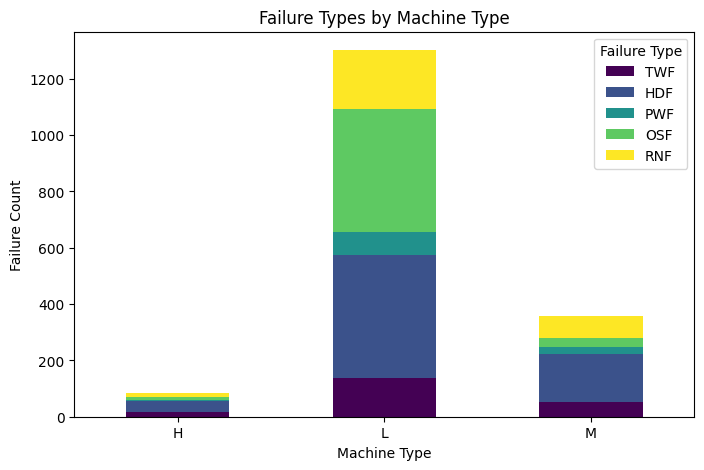

In [39]:
def reconstruct_type(row):
    if row["Type_L"] == 1:
        return "L"
    elif row["Type_M"] == 1:
        return "M"
    else:
        return "H"

train_df["Type"] = train_df.apply(reconstruct_type, axis=1)

# Select failure type columns
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]

# Group by machine type and sum failures
failure_by_type = train_df.groupby("Type")[failure_types].sum()

# Plot stacked bar chart
failure_by_type.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Failure Types by Machine Type")
plt.xlabel("Machine Type")
plt.ylabel("Failure Count")
plt.legend(title="Failure Type")
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart was preferred since it would enable us to compare the aggregate failures per machine type (L, M, H) and the distribution across various failure types (TWF, HDF, PWF, OSF, RNF) within each type of machine. This visualization best suits categorical data with more subcategories so it is simpler to see which kinds of failures add up the most to machine malfunctions.

##### 2. What is/are the insight(s) found from the chart?

If one type of machine has dramatically more failures, it could signal that design problems, operating conditions, or utilization intensity are leading to breakdowns.
The breakdown of failure types by machine type can indicate which failures occur most frequently for certain machine classes.
If there is a greater prevalence of a particular type of failure mode in certain machine types (for example, HDF failures occurring more frequently in Type H machines), this implies that focused preventive maintenance approaches can be formulated for each machine type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed, these findings can maximize maintenance schedules, minimize downtime, and maximize operational efficiency
By determining which types of machines are most failure-prone, companies can maximize inspections and maintenance activities where they are needed the most.
Knowledge of the prevalent failure modes for each machine type permits interventions aimed at specific points (e.g., strengthening components that tend to wear more in a particular machine type).
If one form of failure is out of proportion on all machines, companies can research and re-engineer vulnerable components, enhance operating conditions, or train employees better to reduce risks.
This data-intensive strategy will serve to minimize failures of machines, enhance productivity, and reduce operation costs

#### Chart - 12

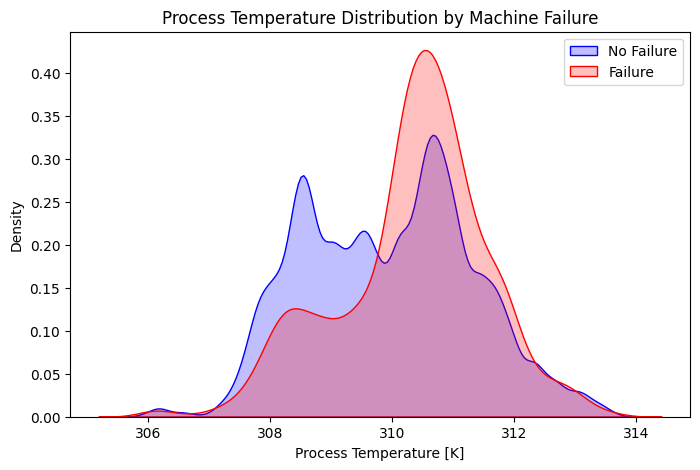

In [40]:
# KDE plot for process temperature based on machine failure
plt.figure(figsize=(8, 5))
sns.kdeplot(train_df[train_df["Machine failure"] == 0]["Process temperature [K]"], label="No Failure", shade=True, color="blue")
sns.kdeplot(train_df[train_df["Machine failure"] == 1]["Process temperature [K]"], label="Failure", shade=True, color="red")
plt.title("Process Temperature Distribution by Machine Failure")
plt.xlabel("Process Temperature [K]")
plt.ylabel("Density")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A Kernel Density Estimate (KDE) plot was used since it provides a good way of visualizing the distribution of process temperature values for failure cases versus non-failure cases. In contrast to histograms, KDE plots offer a smooth estimate of the density of the data and are easier to use in finding trends, overlap, and discrepancies between failure and non-failure cases.

##### 2. What is/are the insight(s) found from the chart?

If the red (failure) curve overlaps considerably or diverges from the blue (no failure) curve, it means that process temperature contributes to machine failure.
If there are more failures at higher or lower temperatures, companies can set safe operating temperature ranges.
A steep spike in the failure curve at some particular temperature might indicate that the machines are more likely to fail when running around that range, perhaps because they overheat or inefficiently cool.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed! These findings can give rise to preventive actions that minimize machine breakdowns.
If breakdowns are associated with high process temperatures, companies can install temperature monitoring systems and automatic shutdowns to avoid overheating.
Operators can be taught to control process temperatures at stable levels, minimizing the chances of unplanned failures.
If temperature variability is a primary consideration, equipment modifications (such as better cooling systems) can maximize machine life, minimizing repair expense and downtime.
By taking advantage of these findings, businesses can enhance machine reliability, reduce maintenance expenses, and increase overall operational effectiveness.

#### Chart - 13

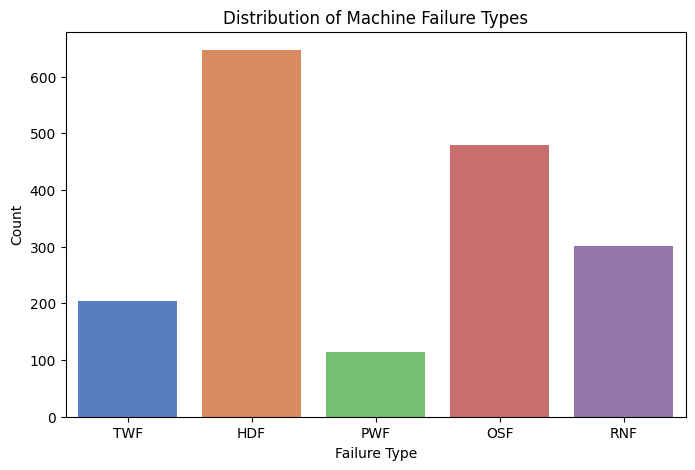

In [36]:
# Select failure type columns
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]

# Count occurrences of each failure type
failure_counts = train_df[failure_types].sum()

# Plot countplot
plt.figure(figsize=(8, 5))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette="muted")
plt.title("Distribution of Machine Failure Types")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is the optimal option for plotting categorical data such as failure types since it presents a good comparison of various failure modes. Every failure type is plotted with a different bar, and their frequencies can be compared easily.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

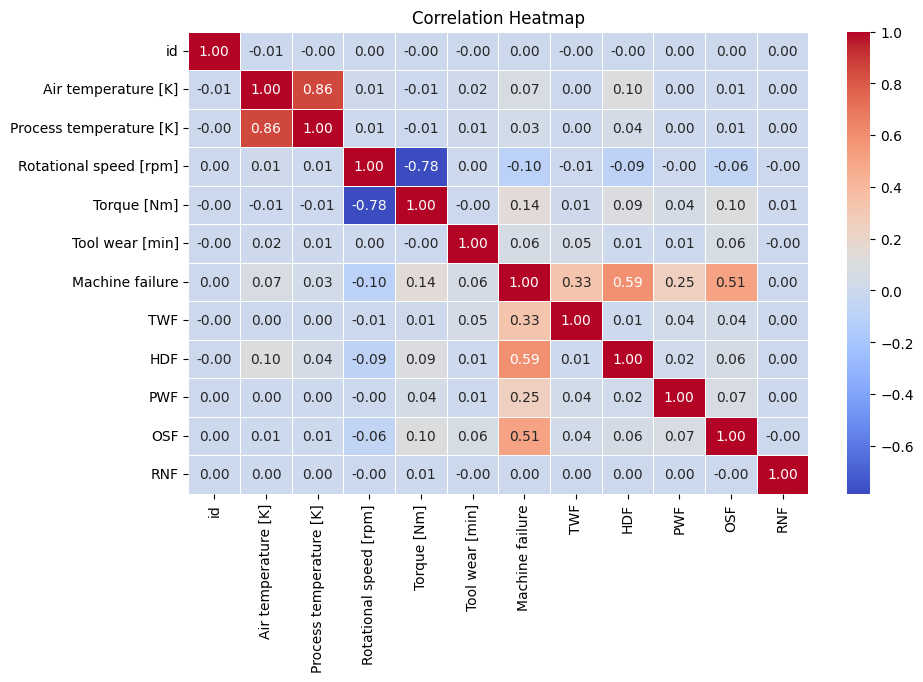

In [24]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

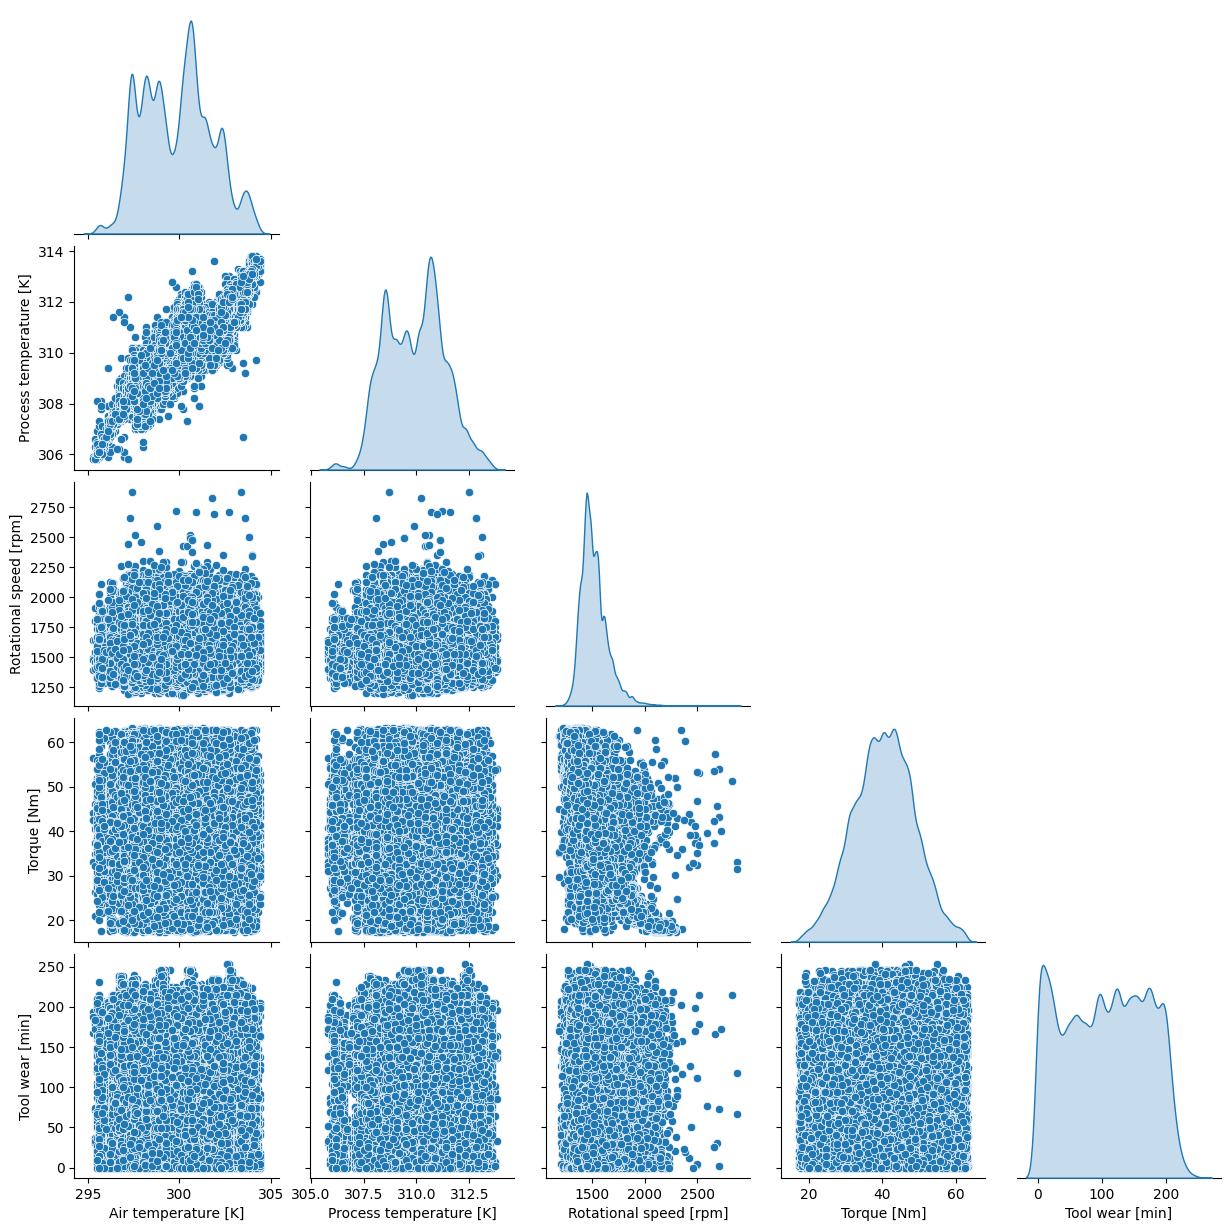

In [26]:

# Selecting key numerical columns for pairplot
selected_columns = ["Air temperature [K]", "Process temperature [K]", 
                    "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

# Drop NaN values for cleaner visualization
pairplot_data = train_df[selected_columns].dropna()

# Pairplot
sns.pairplot(pairplot_data, diag_kind="kde", corner=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***